In [ ]:
import scipy
from scipy import integrate
result,error=integrate.quad(lambda x:x**2,0,1)
print("Result:",result)
print("Error:",error)

Result: 0.33333333333333337
Error: 3.700743415417189e-15


In [ ]:
import numpy as np
from scipy import optimize
result_optimization=optimize.minimize_scalar(lambda x:x**2 + 3*x + 5)
print("optimization result:",result_optimization)

optimization result:  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.75
       x: -1.5000000000000002
     nit: 4
    nfev: 8


interpolation result: 2.0


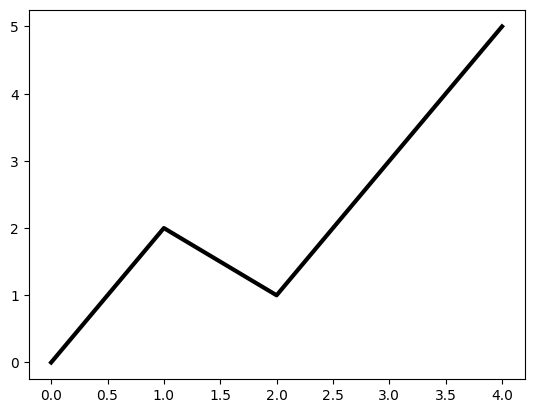

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x_data=np.array([0,1,2,3,4])
y_data=np.array([0,2,1,3,5])
interp_func=interpolate.interp1d(x_data,y_data,kind='linear')
interp_result=interp_func(2.5)
print('interpolation result:',interp_result)
plt.plot(x_data,y_data,linewidth='3',color='black')
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
import random
np.random.seed(0)
print(random.random())
print(random.random())
data=pd.DataFrame({
    'treatment':np.random.choice(['A','B','C'],size=100),'score':np.random.normal(loc=10,scale=2,size=100),'fees':np.random.normal(loc=8,scale=2,size=100)})
print(data)


0.18778860268639797
0.5298516165316691
   treatment      score       fees
0          A   8.626821   7.704389
1          B  10.029747  11.367655
2          A   9.248668   9.943664
3          B   9.923553  11.215348
4          B  10.735949   7.485745
..       ...        ...        ...
95         A   9.933528   7.169544
96         C  10.131283   6.721828
97         A  10.531571  12.995535
98         B  12.303684   1.989744
99         C  10.276086   6.252006

[100 rows x 3 columns]


In [ ]:
group_A=data[data['treatment']=='A']['score']
group_B=data[data['treatment']=='B']['score']
group_C=data[data['treatment']=='C']['score']
t_stat,p_value=stats.ttest_ind(group_A,group_B)
print("t-statistic:",t_stat)
print("p-value:",p_value)

t-statistic: -1.0341676575352792
p-value: 0.3045674995802033


In [ ]:
f_stat,p_value=stats.f_oneway(data[data['treatment']=='A']['score'],data[data['treatment']=='B']['score'],data[data['treatment']=='C']['score'])
print("f-statistic:",f_stat)
print("p-value:",p_value)

f-statistic: 0.6019178068930898
p-value: 0.5497930622874936


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all data into a single array
all_data = np.concatenate([group_A, group_B,group_C])

# Create labels for groups
labels = ['Group 1'] * len(group_A) + ['Group 2'] * len(group_B) + ['Group 3'] * len(group_C)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, labels, alpha=0.05)

# Print pairwise comparisons
print(tukey_results)

# Get confidence intervals for specific pairwise comparisons
#print(tukey_results.confint_diff())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group 1 Group 2   0.4881 0.5599 -0.6399  1.616  False
Group 1 Group 3   0.3994 0.7101 -0.8041  1.603  False
Group 2 Group 3  -0.0886 0.9842 -1.3279 1.1506  False
-----------------------------------------------------


In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
x=sm.add_constant(data['treatment'].replace({'A':0,'B':1,'C':2}))
model=sm.OLS(data['score'],x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7559
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.387
Time:                        09:29:08   Log-Likelihood:                -210.90
No. Observations:                 100   AIC:                             425.8
Df Residuals:                      98   BIC:                             431.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6932      0.299     32.452      0.0

In [ ]:
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Add a constant to the independent variable (for intercept estimation)
X = sm.add_constant(X)

# Create OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print summary of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.124
Time:                        09:28:44   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
